### Arterial Data Exploration

### This Notebook is an exploration of data aimed to find new ways to optimize and understand the arterial network.

#### Much of the work here was done in conjunction with Python Charmers, as a learning activity, and utilized the induction loop detection data through the arterial road network.


In [2]:
from urllib.request import urlretrieve
import pandas as pd

In [3]:
urlretrieve('https://bit.ly/PythonCharmers_VicRoads4', filename='FRA_lanes.h5')

('FRA_lanes.h5', <http.client.HTTPMessage at 0x203051b1cf8>)

In [49]:
fra_lanes= pd.read_hdf('FRA_lanes.h5')

### Average DS by time of day
#### DS being degree of saturation, a measurement used to show how utilized a approach(road lane) is.

In [50]:
fra_lanes.set_index('timestamp', drop=False, inplace=True)

In [6]:
ta = fra_lanes.index[0]

In [7]:
ta

Timestamp('2017-10-02 00:00:00+1100', tz='Australia/Melbourne')

In [8]:
# hours = [ts.hour for ts in fra_lanes.index]
# fra_lanes.groupby(hours)['ds'].mean()plot(kind='bar')


In [9]:
#Shortcut: vectorized access to the hour for each timestamp
fra_lanes.groupby(fra_lanes.index.hour)['ds'].mean().plot(kind='bar')

In [10]:
fra_lanes.head()

,ds,lane,modifier,ph,pt,salk_data,salk_num,site,site_name,timestamp,vk,vo
timestamp,,,,,,,,,,,,
2017-10-02 00:00:00+11:00,0.0,1,^,10,27,S,463,1302,FRA_087,2017-10-02 00:00:00+11:00,0.0,0.0
2017-10-02 00:00:00+11:00,12.0,2,^,10,27,S,463,1302,FRA_087,2017-10-02 00:00:00+11:00,1.0,2.0
2017-10-02 00:00:00+11:00,12.0,3,^,10,27,S,463,1302,FRA_087,2017-10-02 00:00:00+11:00,1.0,NaN
2017-10-02 00:00:00+11:00,12.0,4,^,10,27,S,463,1302,FRA_087,2017-10-02 00:00:00+11:00,1.0,NaN
2017-10-02 00:00:00+11:00,8.0,1,,1,51,S,493,1302,FRA_087,2017-10-02 00:00:00+11:00,2.0,2.0


### Exercise: group by SA and find the average degree of saturation

In [11]:
fra_lanes.groupby('salk_num')['ds'].mean()

salk_num
160    26.081678
161    26.371758
463    14.981219
493    26.095560
494     8.025739
495    25.979558
496    14.705639
497    25.541482
498    15.657122
Name: ds, dtype: float64

In [12]:
fra_lanes.groupby(['salk_num','lane'])['ds'].mean()

salk_num  lane
160       1       24.236642
          2       26.878535
          3       26.864991
          4       26.351158
161       1       29.119460
          2       26.320476
          3       25.678141
          4       24.286872
463       1       13.081934
          2       16.702352
          3       15.684517
          4       14.441700
493       1       24.264310
          2       26.906203
          3       26.864991
          4       26.351158
494       1        6.407329
          2        8.873700
          3        8.749781
          4        8.077062
495       1       28.344554
          2       25.545571
          3       25.678141
          4       24.286872
496       1       15.386631
          2       15.386631
          3       15.386631
          4       12.508423
497       1       25.433974
          2       25.969912
          3       25.898491
          4       24.841356
498       1       15.593201
          2       15.737485
          3       15.734489
     

In [13]:
avg_ds = fra_lanes.groupby(['salk_num', fra_lanes.index.hour])['ds'].mean().unstack()

In [14]:
avg_ds

timestamp,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
salk_num,,,,,,,,,,,,,,,,,,,,,
160,4.071879,2.597496,2.065688,1.956390,3.777832,10.280632,24.726479,31.686587,54.054557,58.706564,...,55.171402,65.729406,63.775892,58.445621,47.391606,30.787212,22.847964,17.122448,11.506011,7.239718
161,6.980785,4.163927,3.052906,2.528628,3.299902,6.449602,15.975513,24.781795,34.989363,35.365807,...,66.565537,74.706644,73.157618,70.445562,47.052884,36.161617,33.079371,29.210076,20.305481,11.422264
463,3.845047,1.891896,1.215703,0.797786,0.996992,2.431038,9.459645,11.978986,17.025820,20.719480,...,29.530290,49.158234,53.781176,53.340871,40.064083,26.049856,20.268877,18.041265,13.692193,7.496018
493,4.071879,2.597496,2.065688,1.956390,3.777832,10.280632,24.726479,31.685739,54.033059,58.697751,...,55.168059,66.076190,63.920747,58.487315,47.440732,30.787212,22.847964,17.122448,11.506011,7.239718
494,0.373894,0.268359,0.427266,0.522871,1.618265,14.594019,29.453679,32.781486,26.296963,21.836937,...,8.416280,13.159996,11.969079,12.357090,6.861788,2.003739,1.076893,0.751525,0.558651,0.399795
495,6.980785,4.163927,3.052906,2.528628,3.299902,6.449602,15.975513,24.781795,34.988557,35.365807,...,65.773642,69.210426,69.315339,65.761922,46.836679,36.159409,33.074193,29.210076,20.304964,11.422264
496,0.201649,0.059632,0.107349,0.062716,0.061217,0.436520,3.087161,8.648464,20.400670,23.559137,...,53.823425,46.457592,43.453541,40.733052,30.533055,17.837120,13.191384,9.148066,3.200925,1.022566
497,5.525239,3.187471,2.066466,1.570638,2.702143,11.136283,21.917687,37.095247,42.801055,41.957817,...,49.117490,57.694674,62.782568,61.603401,44.225197,36.384269,34.699430,35.167857,28.249044,11.888682
498,3.668353,2.808034,2.310814,2.059190,2.448714,3.327132,6.002461,13.462705,23.732348,29.713029,...,36.037515,38.320023,39.236649,35.275501,30.110904,24.415372,18.553810,14.421565,11.386525,6.366208


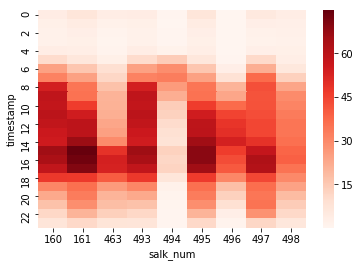

In [17]:
import seaborn
seaborn.heatmap(avg_ds.T, cmap='Reds')

### Selecting data by some criterion (e.g weekdays only) 

2-step process to select a subset:
1. create a mask / criterion: boolean Series (True / False)
2. Use `.loc[mask]`



In [18]:
fra_lanes.index.weekday_name

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='timestamp', length=6792243)

In [19]:
fra_lanes.index.weekday

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='timestamp', length=6792243)

In [20]:
# Step 1:
weekday_criterion = (fra_lanes.index.weekday < 5 )
# Step 2:
fra_lanes_weekdays = fra_lanes[weekday_criterion]

fra_lanes_weekdays = fra_lanes[~weekday_criterion] # tilde: "not"

# Heatmap from above for weekdays and weekends separately

In [21]:
groups = ['salk_num', fra_lanes_weekdays.index.hour]
avg_ds_weekdays = fra_lanes_weekdays.groupby(groups)['ds'].mean().unstack()

In [22]:
import matplotlib.pyplot as plt

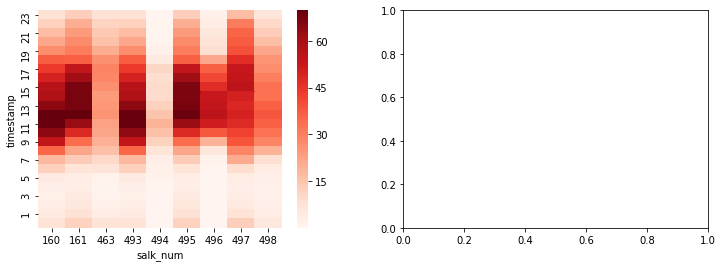

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
seaborn.heatmap(avg_ds_weekdays.T[::-1], cmap='Reds', ax=axes[0])

### Clustering
A basic use case of Machine Learning using clustering to understand traffic data better.


In [31]:
fra_lanes.head()

,ds,lane,modifier,ph,pt,salk_data,salk_num,site,site_name,timestamp,vk,vo
timestamp,,,,,,,,,,,,
2017-10-02 00:00:00+11:00,0.0,1,^,10,27,S,463,1302,FRA_087,2017-10-02 00:00:00+11:00,0.0,0.0
2017-10-02 00:00:00+11:00,12.0,2,^,10,27,S,463,1302,FRA_087,2017-10-02 00:00:00+11:00,1.0,2.0
2017-10-02 00:00:00+11:00,12.0,3,^,10,27,S,463,1302,FRA_087,2017-10-02 00:00:00+11:00,1.0,NaN
2017-10-02 00:00:00+11:00,12.0,4,^,10,27,S,463,1302,FRA_087,2017-10-02 00:00:00+11:00,1.0,NaN
2017-10-02 00:00:00+11:00,8.0,1,,1,51,S,493,1302,FRA_087,2017-10-02 00:00:00+11:00,2.0,2.0


In [32]:
(fra_lanes['lane'] == 1) | (fra_lanes['lane'] == 2)

timestamp
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02

In [33]:
fra_lanes['lane'].isin([1,2])

timestamp
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02

In [34]:
fra_lanes['lane'].isin([3,4]) # is the value of lane either 3 or 4

timestamp
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00    False
2017-10-02 00:00:00+11:00     True
2017-10-02 00:00:00+11:00     True
2017-10-02

In [51]:
(fra_lanes['salk_num'] == 496) & (fra_lanes['lane']==2) #sa number is 496 and lane is 2 - both must be True for True

bad_data = fra_lanes['lane'].isin([3,4]) | (
(fra_lanes['salk_num'] == 496) & (fra_lanes['lane']==2)) #either lane is 3 or 4, or both sa num is 496 and lane is 2

In [52]:
fra_lanes = fra_lanes.loc[~bad_data] # is the opposite - so only keep good data (not bad data)

In [53]:
len(fra_lanes)

3238619

In [54]:
fra_lanes.sample()

,ds,lane,modifier,ph,pt,salk_data,salk_num,site,site_name,timestamp,vk,vo
timestamp,,,,,,,,,,,,
2017-11-30 20:33:00+11:00,0.0,1,^,10,24,S,463,1302,FRA_087,2017-11-30 20:33:00+11:00,0.0,0.0


Clustering makes the assumption that you don't have a pre-existing classification for your data.

scikit-learn makes the assumption that all your data is represented as rows of samples and columns of attributes of features of those samples - conveniently pandas makes the same assumption.

In [55]:
fra_lanes = fra_lanes.loc[fra_lanes['salk_data'] == 'S']
fra_lanes.sample()

,ds,lane,modifier,ph,pt,salk_data,salk_num,site,site_name,timestamp,vk,vo
timestamp,,,,,,,,,,,,
2017-08-16 02:15:00+10:00,0.0,1,^,5,0,S,497,1302,FRA_087,2017-08-16 02:15:00+10:00,0.0,0.0


In [56]:
fra_lanes.set_index(['timestamp', 'salk_num', 'lane'], inplace=True)

In [57]:
volumes = fra_lanes['vo'].reset_index()

In [58]:
volumes

,timestamp,salk_num,lane,vo
0,2017-10-02 00:00:00+11:00,463,1,0.0
1,2017-10-02 00:00:00+11:00,463,2,2.0
2,2017-10-02 00:00:00+11:00,493,1,2.0
3,2017-10-02 00:00:00+11:00,493,2,3.0
4,2017-10-02 00:00:00+11:00,494,1,0.0
5,2017-10-02 00:00:00+11:00,494,2,0.0
6,2017-10-02 00:00:00+11:00,495,1,0.0
7,2017-10-02 00:00:00+11:00,495,2,0.0
8,2017-10-02 00:00:00+11:00,496,1,0.0
9,2017-10-02 00:00:00+11:00,497,1,0.0


In [59]:
volumes = volumes.groupby(
['timestamp', 'salk_num', 'lane'])['vo'].sum().unstack()

In [60]:
volumes

lane                                  1    2
timestamp                 salk_num          
2017-07-01 00:00:00+10:00 463       0.0  3.0
                          493       2.0  2.0
                          494       0.0  0.0
                          495       2.0  2.0
                          496       0.0  NaN
                          497       0.0  0.0
                          498       0.0  0.0
2017-07-01 00:01:00+10:00 463       0.0  0.0
                          493       0.0  0.0
                          494       0.0  0.0
                          495       2.0  2.0
                          496       0.0  NaN
                          497       0.0  0.0
                          498       0.0  0.0
2017-07-01 00:02:00+10:00 463       0.0  0.0
                          493       0.0  0.0
                          494       0.0  0.0
                          495       2.0  0.0
                          496       0.0  NaN
                          497       0.0  0.0
                          498       0.0  0.0
2017-07-01 00:03:00+10:00 463       2.0  3.0
                          493       3.0  4.0
                          494       0.0  0.0
                          495       0.0  2.0
                          496       0.0  NaN
                          497       3.0  2.0
                          498       0.0  0.0
2017-07-01 00:04:00+10:00 463       2.0  3.0
                          493       3.0  4.0
...                                 ...  ...
2017-12-31 23:54:00+11:00 497       0.0  0.0
                          498       0.0  2.0
2017-12-31 23:55:00+11:00 463       0.0  0.0
                          493       6.0  4.0
                          494       0.0  0.0
                          495       0.0  0.0
                          496       0.0  NaN
                          497       0.0  0.0
                          498       2.0  0.0
2017-12-31 23:56:00+11:00 463       0.0  0.0
                          493       3.0  0.0
                          494       0.0  0.0
                          495       0.0  0.0
                          496       0.0  NaN
                          497       0.0  0.0
                          498       0.0  0.0
2017-12-31 23:57:00+11:00 463       0.0  0.0
                          493       3.0  0.0
                          494       0.0  0.0
                          495       0.0  0.0
                          496       0.0  NaN
                          497       0.0  0.0
                          498       0.0  0.0
2017-12-31 23:58:00+11:00 463       0.0  2.0
                          493       2.0  3.0
                          494       2.0  2.0
                          495       2.0  2.0
                          496       0.0  NaN
                          497       0.0  0.0
                          498       4.0  0.0

[1266769 rows x 2 columns]

In [33]:
from sklearn import cluster

#### The k-means algorithm is as follows:

#### You give a number k of the number of clusters you want
#### The algorithm:
- Randomly places a centre of the cluster
- Measures the distance of each sample from the centre
- Compares the size of each cluster
- Moves centre and tries again to get a "more equal size"
- Repeat n times
- Return cluster labels

In [34]:
model = cluster.MiniBatchKMeans(n_clusters=6)

In [35]:
volumes.head()

lane                            1    2  kmeans  avg traffic    1    2
timestamp           salk_num                                         
2017-06-30 14:00:00 463       0.0  3.0       3          1.5  0.0  3.0
                    493       2.0  2.0       0          2.0  2.0  2.0
                    494       0.0  0.0       3          0.0  0.0  0.0
                    495       2.0  2.0       0          2.0  2.0  2.0
                    496       0.0  NaN       3          0.0  0.0  NaN

In [36]:
model.fit(volumes.fillna(0))

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=6,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [37]:
volumes['kmeans'] = model.predict(volumes.fillna(0))

In [38]:
volumes['kmeans'].value_counts()

0    632943
3    247095
2    164175
4     99020
5     74977
1     48559
Name: kmeans, dtype: int64

In [40]:
volumes.to_hdf('volumes_data.h5', 'volumes')

C:\Anaconda\lib\site-packages\pandas\io\pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
C:\Anaconda\lib\site-packages\pandas\io\pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  f(store)


In [41]:
import pandas as pd

In [42]:
import seaborn as sns

In [43]:
volumes = pd.read_hdf('volumes_data.h5')

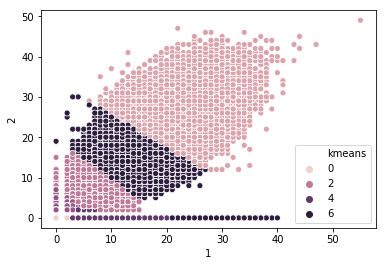

In [44]:
sns.scatterplot(x=1,y=2,data=volumes, hue='kmeans')

### Cluster into four groups using the average of two lanes
Re-create the model with 4 clusters instead of 8. Instead of using two separate lanes, we'll take the average of both lanes. This may be a too broad approach, we'll see

In [45]:
volumes['avg traffic'] = volumes[[1,2]].mean(axis=1) 

In [46]:
import altair as alt

In [47]:
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [48]:
volumes['1'] = volumes[1]
volumes['2'] = volumes[2]

In [49]:
volumes[:3]

lane                            1    2  kmeans  avg traffic    1    2
timestamp           salk_num                                         
2017-06-30 14:00:00 463       0.0  3.0       3          1.5  0.0  3.0
                    493       2.0  2.0       3          2.0  2.0  2.0
                    494       0.0  0.0       0          0.0  0.0  0.0

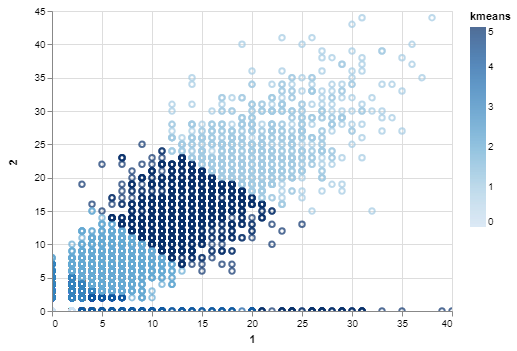

In [50]:
alt.Chart(volumes.reset_index().sample(20000)).mark_point().encode(
    x='1',
    y='2',
    color='kmeans'
).interactive()

In [51]:
small_volumes = volumes.sample(100000)

In [52]:
import matplotlib.pyplot as plt

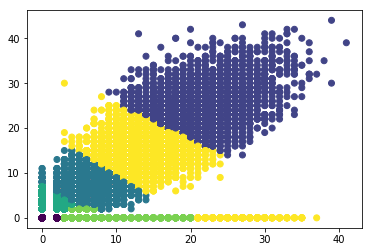

In [53]:
plt.scatter(small_volumes[1], small_volumes[2], c=small_volumes['kmeans'])

In [54]:
model.cluster_centers_

array([[2.82998944e-01, 0.00000000e+00, 2.57550158e+00, 1.64730729e-01,
        2.82998944e-01, 0.00000000e+00],
       [2.14666667e+01, 2.53200000e+01, 1.00000000e+00, 2.33933333e+01,
        2.14666667e+01, 2.53200000e+01],
       [5.49809886e+00, 6.07604563e+00, 4.92395437e+00, 5.78707224e+00,
        5.49809886e+00, 6.07604563e+00],
       [1.49861496e+00, 2.68975069e+00, 2.17728532e+00, 2.09418283e+00,
        1.49861496e+00, 2.68975069e+00],
       [5.00000000e+00, 3.33333333e-01, 1.38888889e-02, 3.94097222e+00,
        5.00000000e+00, 3.33333333e-01],
       [1.31454545e+01, 1.43090909e+01, 3.41818182e+00, 1.37272727e+01,
        1.31454545e+01, 1.43090909e+01]])

In [55]:
volumes.reset_index(1, inplace=True)

In [57]:
volumes['hour'] = volumes.index.hour

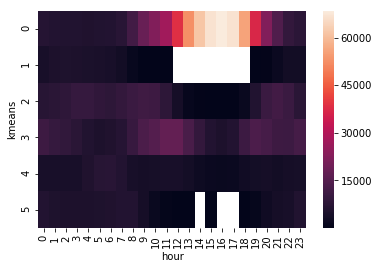

In [59]:
sns.heatmap(
volumes.groupby(['kmeans','hour']).size().unstack()
)

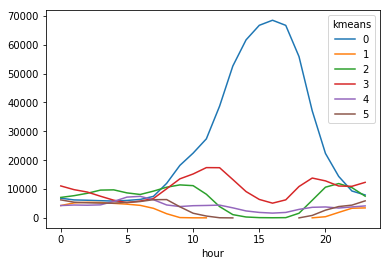

In [61]:
volumes.groupby(['kmeans', 'hour']).size().unstack(0).plot()

In [66]:
volumes.head()

lane,salk_num,1,2,kmeans,avg traffic,1,2,hour
timestamp,,,,,,,,
2017-06-30 14:00:00,463,0.0,3.0,3,1.5,0.0,3.0,14
2017-06-30 14:00:00,493,2.0,2.0,3,2.0,2.0,2.0,14
2017-06-30 14:00:00,494,0.0,0.0,0,0.0,0.0,0.0,14
2017-06-30 14:00:00,495,2.0,2.0,3,2.0,2.0,2.0,14
2017-06-30 14:00:00,496,0.0,NaN,0,0.0,0.0,NaN,14


In [67]:
volumes.to_hdf('volumes.h5', key='volumes_preprocessed')

C:\Anaconda\lib\site-packages\pandas\io\pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
C:\Anaconda\lib\site-packages\pandas\io\pytables.py:279: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  f(store)


#### Another clustering methodology 
### DBSCAN. 

#### You don't supply a number of clusters - you supply an "epsilon" which is the max distance apart values can be in the same cluster. Useful for traffic data types.

In [76]:
model = cluster.DBSCAN(eps=.5) # this is the only thing that changes between cluster models

In [77]:
small_volumes['DBSCAN'] = model.fit_predict(small_volumes[['avg traffic']])

In [78]:
small_volumes['DBSCAN'].value_counts()

 0    56489
 1    43509
-1        2
Name: DBSCAN, dtype: int64

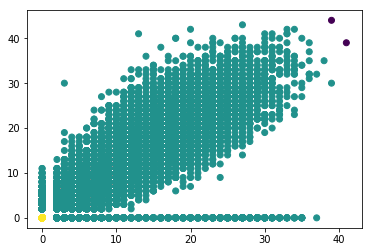

In [79]:
plt.scatter(small_volumes[1],small_volumes[2], c=small_volumes['DBSCAN'])

In [80]:
small_volumes.loc[small_volumes['DBSCAN']==-1]

,lane,1,2,kmeans,avg traffic,1,2,DBSCAN
timestamp,salk_num,,,,,,,
2017-08-22 22:47:00,493,39.0,44.0,1,41.5,39.0,44.0,-1
2017-11-28 05:43:00,495,41.0,39.0,1,40.0,41.0,39.0,-1
